In [1]:
import os
import sys
import time

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import tensorflow
import tensorflow as tf
tf.__version__

'2.12.0'

In [4]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
import warnings
warnings.simplefilter("ignore")

In [7]:
cwd = os.getcwd()
cwd

'/Users/Meysam/WORK2/CurrentWork_codes'

In [8]:
steps = 200
x = np.array(range(steps))
noise = np.random.uniform(-0.25, 0.25, steps)
y = np.sin(np.pi * x / 30) + np.cos(np.pi * x / 10) + x / 200. + noise
x.shape, y.shape

((200,), (200,))

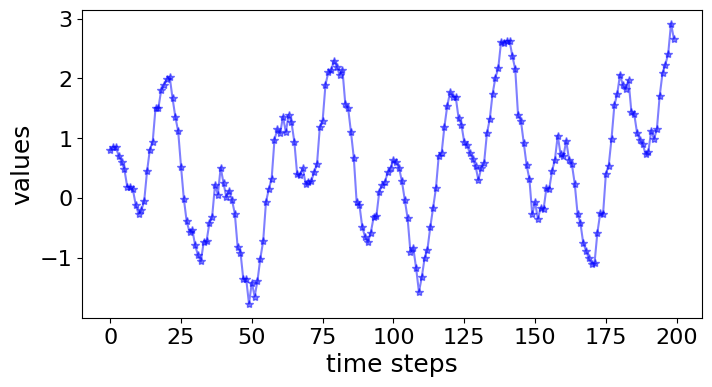

In [9]:
plt.figure(figsize=(8,4))
plt.plot(x, y, '-*', color='b', alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.show()

In [10]:
steps_valid = 100
x_valid = np.array(np.arange(steps,steps+steps_valid))
noise_valid = np.random.uniform(-0.25, 0.25, steps_valid)
y_valid = np.sin(np.pi * x_valid / 30) + np.cos(np.pi * x_valid / 10) + x_valid / 200. + noise_valid

In [11]:
x_valid.shape, y_valid.shape

((100,), (100,))

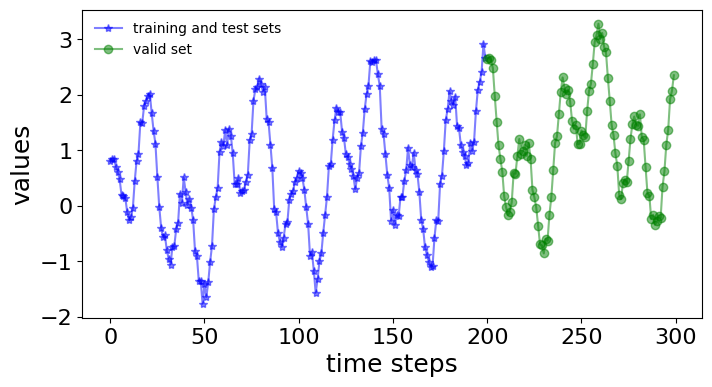

In [12]:
plt.figure(figsize=(8,4))
plt.plot(x, y, '-*', label='training and test sets', color='b',alpha=0.5)
plt.plot(x_valid, y_valid, '-o', label='valid set', color='g',alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [13]:
y= y.reshape(-1, 1)
y.shape

(200, 1)

In [14]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y.reshape(-1, 1))
y_trans = scaler.transform(y.reshape(-1, 1))

In [15]:
scaler = scaler.fit(y_valid.reshape(-1, 1))
y_valid_trans = scaler.transform(y_valid.reshape(-1, 1))

In [16]:
y_valid_trans.shape

(100, 1)

In [17]:
# generate the input and output sequences
n_lookback = 10  # length of input sequences (lookback period)
n_forecast = steps_valid  # length of output sequences (forecast period)

In [18]:
X = []
Y = []

for i in range(n_lookback, len(y_trans) - n_forecast + 1):
    X.append(y_trans[i - n_lookback: i])
    Y.append(y_trans[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

((91, 10, 1), (91, 100, 1))

In [19]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

In [20]:
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mse', optimizer='adam', )

In [21]:
start_time = time.time()

#model.fit(X, Y, epochs=100, batch_size=1, verbose=0)
model.fit(X, Y, epochs=300, batch_size=32, verbose=0)

print("--- predict_optimize_LSTM took: %s seconds ---" % (time.time() - start_time))

--- predict_optimize_LSTM took: 11.070392847061157 seconds ---


In [22]:
# generate the forecasts
x_ = y_trans[- n_lookback:]  # last available input sequence
x_ = x_.reshape(1, n_lookback, 1)

In [23]:
x_.shape

(1, 10, 1)

In [24]:
y_ = model.predict(x_).reshape(-1, 1)
y_pred = scaler.inverse_transform(y_)[:,0]

1/1 [==============================] - 1s 858ms/step


In [25]:
y_.shape, y_pred.shape

((100, 1), (100,))

In [26]:
x_valid.shape, y_pred.shape

((100,), (100,))

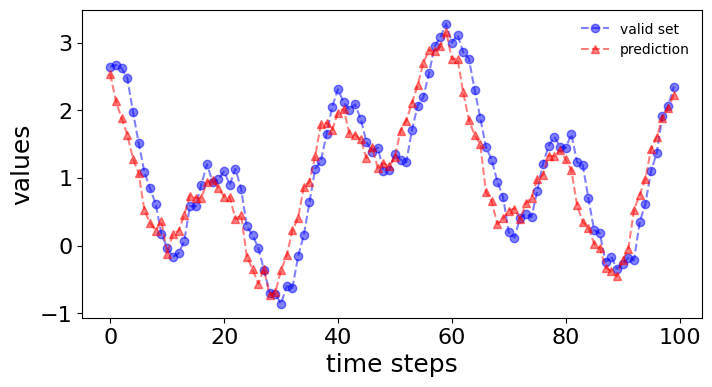

In [27]:
plt.figure(figsize=(8,4))
plt.plot(y_valid, '--o', label='valid set', color='b',alpha=0.5)
plt.plot(y_pred, '--^', label='prediction', color='r',alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

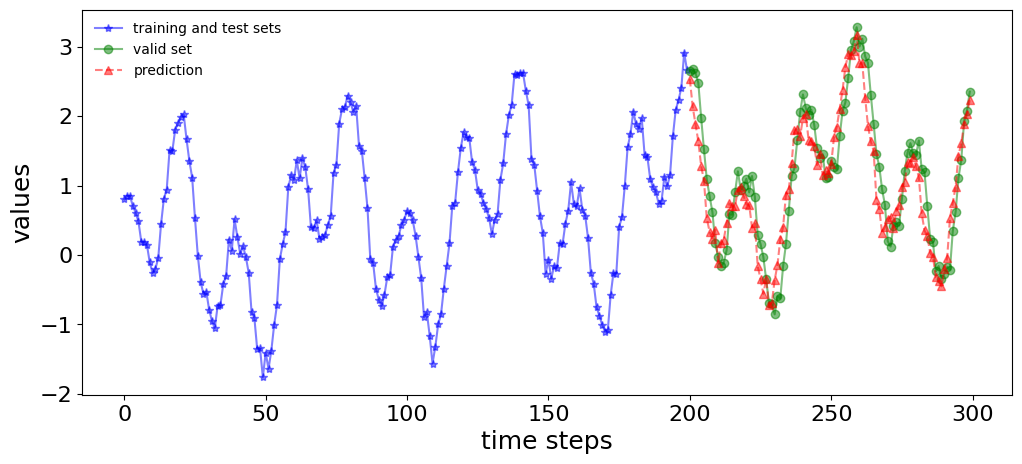

In [28]:
plt.figure(figsize=(12,5))
plt.plot(x, y, '-*', label='training and test sets', color='b', alpha=0.5)
plt.plot(x_valid, y_valid, '-o', label='valid set', color='g', alpha=0.5)
plt.plot(x_valid, y_pred, '--^', label='prediction', color='red', alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [29]:
y_valid.shape, y_pred.shape

((100,), (100,))

In [30]:
MSE = np.square(np.subtract(y_valid,y_pred)).mean() 

RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4040531171580273


# Mackey-Glass data

In [31]:
y_mck=np.load(os.path.join(cwd, 'y_mck.npy'))
y_mck.shape

(1000,)

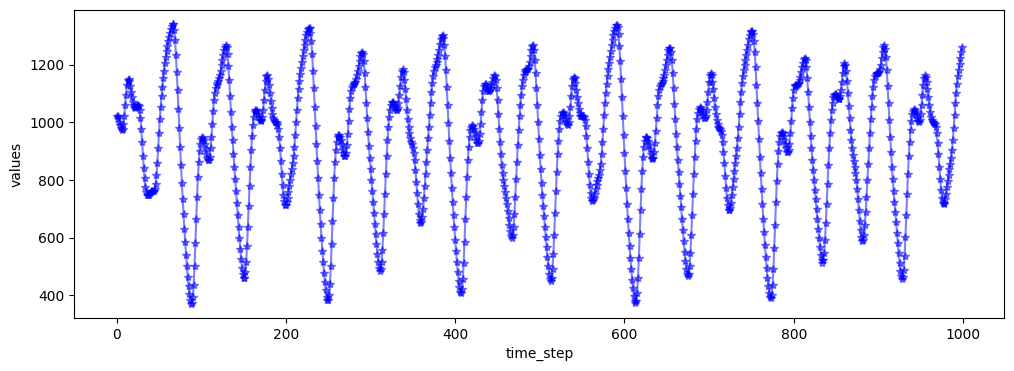

In [32]:
plt.figure(figsize=(12,4))
plt.plot(y_mck, '-*', color='b', alpha=0.5)
plt.xlabel('time_step')
plt.ylabel('values')
plt.show()

In [33]:
steps_valid = 100
nsteps=int(y_mck.shape[0]-steps_valid)

In [34]:
y=y_mck[0:nsteps]
y_valid=y_mck[nsteps:]
y.shape, y_valid.shape

((900,), (100,))

In [35]:
x = np.linspace(0, nsteps, num=len(y))
x_valid = np.linspace(nsteps,len(y)+len(y_valid), num=len(y_valid))
x.shape, x_valid.shape

((900,), (100,))

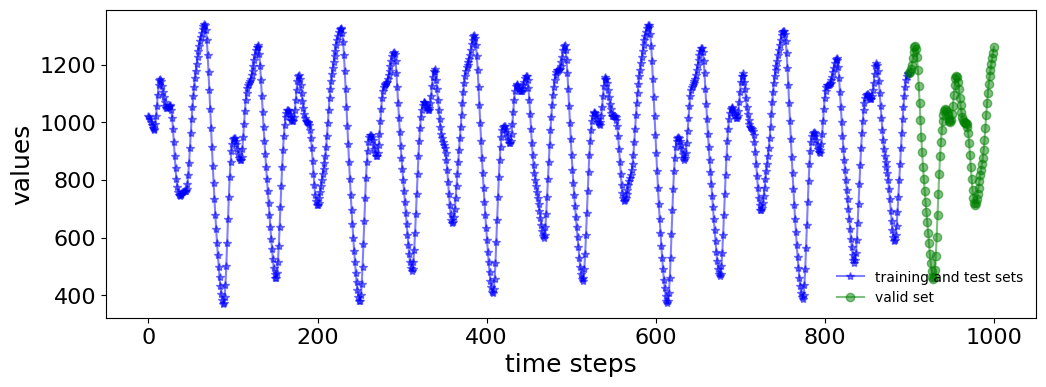

In [36]:
plt.figure(figsize=(12,4))
plt.plot(x, y, '-*', label='training and test sets', color='b',alpha=0.5)
plt.plot(x_valid, y_valid, '-o', label='valid set', color='g',alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [37]:
y= y.reshape(-1, 1)
y.shape

(900, 1)

In [38]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y.reshape(-1, 1))
y_trans = scaler.transform(y.reshape(-1, 1))

In [39]:
scaler = scaler.fit(y_valid.reshape(-1, 1))
y_valid_trans = scaler.transform(y_valid.reshape(-1, 1))

In [40]:
# generate the input and output sequences
n_lookback = 10  # length of input sequences (lookback period)
n_forecast = 100  # length of output sequences (forecast period)

In [41]:
X = []
Y = []

for i in range(n_lookback, len(y_trans) - n_forecast + 1):
    X.append(y_trans[i - n_lookback: i])
    Y.append(y_trans[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

((791, 10, 1), (791, 100, 1))

In [42]:
# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

In [43]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [44]:
start_time = time.time()

model.fit(X, Y, epochs=100, batch_size=1, verbose=0)

print("--- predict_optimize_LSTM took: %s seconds ---" % (time.time() - start_time))

--- predict_optimize_LSTM took: 323.1834397315979 seconds ---


In [45]:
# generate the forecasts
x_ = y_trans[- n_lookback:]  # last available input sequence
x_ = x_.reshape(1, n_lookback, 1)

In [46]:
y_ = model.predict(x_).reshape(-1, 1)
y_pred = scaler.inverse_transform(y_)[:,0]

1/1 [==============================] - 1s 585ms/step


In [47]:
x_valid.shape, y_pred.shape

((100,), (100,))

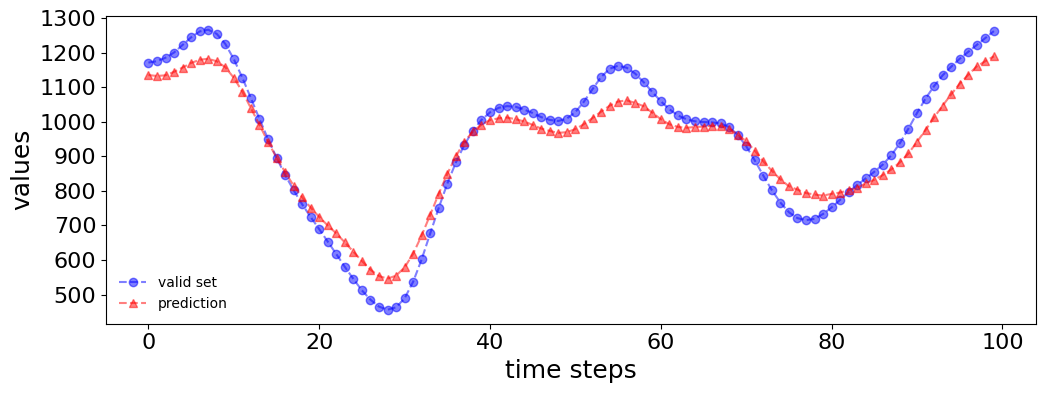

In [48]:
plt.figure(figsize=(12,4))
plt.plot(y_valid, '--o', label='valid set', color='b',alpha=0.5)
plt.plot(y_pred, '--^', label='prediction', color='r',alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

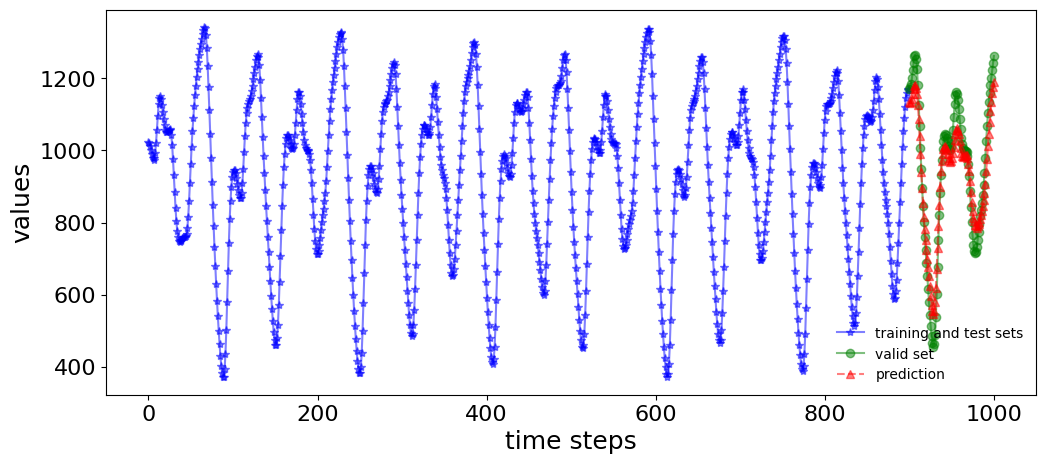

In [49]:
plt.figure(figsize=(12,5))
plt.plot(x, y, '-*', label='training and test sets', color='b', alpha=0.5)
plt.plot(x_valid, y_valid, '-o', label='valid set', color='g', alpha=0.5)
plt.plot(x_valid, y_pred, '--^', label='prediction', color='red', alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [50]:
y_valid.shape, y_pred.shape

((100,), (100,))

In [51]:
MSE = np.square(np.subtract(y_valid,y_pred)).mean() 

RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

57.652515
